#### Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as st
%matplotlib inline

import nltk
nltk.download('punkt')

from nltk.corpus import wordnet,stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


#### Importing data 

In [3]:
import os
os.chdir('/content/drive/MyDrive/PGPAIML/capstone project/Source files')

In [ ]:
#from google.colab import drive
#drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
#df=pd.read_csv('/content/drive/My Drive/PGPAIML/Capstone/EDA/input_data.csv')
#df.tail()

Short description  ... Assignment group
8495                  emails not coming in from zz mail  ...           GRP_29
8496                           telephony_software issue  ...            GRP_0
8497  vip2: windows password reset for tifpdchb pedx...  ...            GRP_0
8498                     machine nÃ£o estÃ¡ funcionando  ...           GRP_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           GRP_49

[5 rows x 4 columns]

In [ ]:
df = pd.read_excel("input_data.xlsx")

#### Description of Data

In [ ]:
# Analyse each column information  - number of non-null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


In [ ]:
df.shape

(8500, 4)

In [ ]:
df.describe()

Short description Description             Caller Assignment group
count               8492        8499               8500             8500
unique              7461        7812               2950               74
top       password reset         the  bpctwhsn kzqsbmtp            GRP_0
freq                  38          56                810             3976

There are 8500 tickets in the dataset and 4 columns are used to describe each ticket. 
* "Short description" and "Description" are used to explain the issue 
* "Caller" represent who inititated the issue  
* "Assignment Group" represents the Functional group that this ticket is assigned to resolve the issue

#### EDA analysis on Data

##### checking for null values

In [ ]:
df.isna().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

##### Finding unique number of "Assignment group" and "Caller"

In [ ]:
#let's find the number of unique values in Caller and Assignment groups
print("Caller :",len(np.unique(df['Caller'])))
print("Assignment group :",len(np.unique(df['Assignment group'])))

Caller : 2950
Assignment group : 74


##### Finding MAX,MIN,MEAN and MEDIAN of length of description

In [ ]:
# Analysing Description
print("Minimum length :", df['Description'].str.len().min())
print("Maximum length :", df['Description'].str.len().max())
print("Mean length :", df['Description'].str.len().mean())
print("Median length :", df['Description'].str.len().median())

Minimum length : 1.0
Maximum length : 13001.0
Mean length : 202.22143781621367
Median length : 106.0


In [ ]:
# Adding a column to find the length of each sentence
df['desc_len']=df['Description'].str.len()
df.head()

Short description  ... desc_len
0                    login issue  ...    206.0
1                        outlook  ...    194.0
2             cant log in to vpn  ...     87.0
3  unable to access hr_tool page  ...     29.0
4                   skype error   ...     12.0

[5 rows x 5 columns]

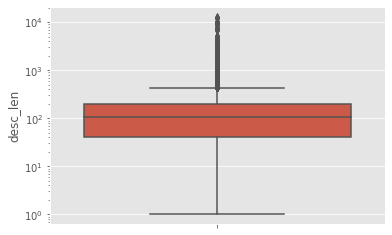

In [ ]:
# Find the distribution of sentence length
sns.boxplot(y=df['desc_len'])
plt.yscale("log")

##### Count of tickets under each group

In [ ]:
df['Assignment group'].value_counts()

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
          ... 
GRP_67       1
GRP_64       1
GRP_73       1
GRP_70       1
GRP_61       1
Name: Assignment group, Length: 74, dtype: int64

##### Number of levels in Target variable

In [ ]:
df['Assignment group'].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

##### Assignment Group Ticket Distribution 

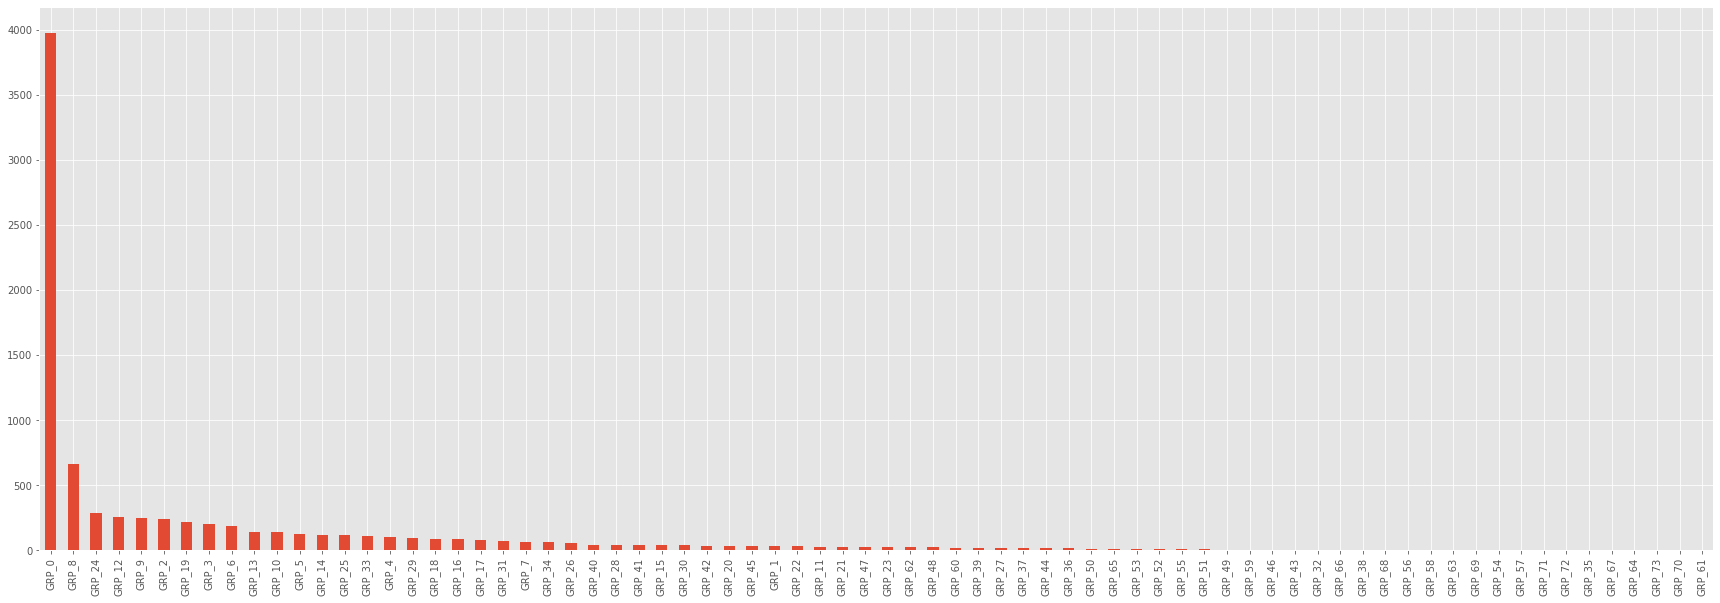

In [ ]:
plt.subplots(figsize=(30,10))
df['Assignment group'].value_counts().plot(kind='bar')

* Target Classes look highly imbalanced as certain Functional Group seems to have just one ticket assigend to them and certain others have many tickets assigned to them.Also, GRP_0 functional group seems to get most number of tickets to resolve

* We observe that ~ 4K tickets are assigned to Grp_0, around 800 to GRP_8 and others less than or equal to 200 . There are around 20 groups in which less than 10 reords are assigned. So there is a high class imbalance in the target variable

In [ ]:
#Excluding top 9 groups and analysing the data
grps_df=df.loc[df['Assignment group'].apply(lambda x: x not in ('GRP_0','GRP_24','GRP_8','GRP_9','GRP_12','GRP_2','GRP_19','GRP_3','GRP_6'))]

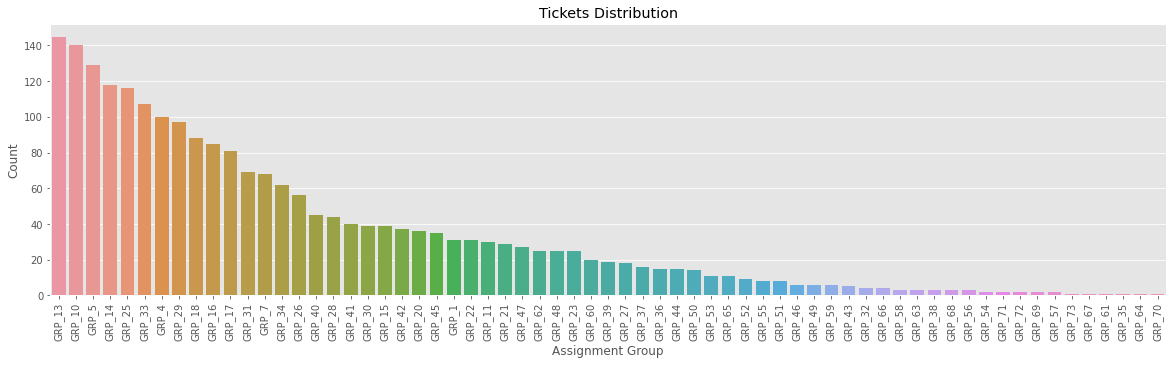

In [ ]:
#plot after excluding top 9 group
plt.subplots(figsize = (20,5))

sns.countplot(x='Assignment group', data=grps_df,order = grps_df['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Tickets Distribution')

plt.show()

In [ ]:
#remove spaces trailing
df['Short description'] = df['Short description'].str.strip()
df['Description'] = df['Description'].str.strip()

#remove tabs and carriage returns
df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=[" "," "], regex=True, inplace=True)

#remove digits    
df['Description'] = df['Description'].replace('\d+', '', regex=True)
df['Short description'] = df['Short description'].replace('\d+', '', regex=True)
    
#remove more than 1 space
df.replace('\s+', ' ', regex=True, inplace=True)

#make lower case
df.apply(lambda x: x.astype(str).str.lower())

Short description  ... Assignment group
0                                           login issue  ...            grp_0
1                                               outlook  ...            grp_0
2                                    cant log in to vpn  ...            grp_0
3                         unable to access hr_tool page  ...            grp_0
4                                           skype error  ...            grp_0
...                                                 ...  ...              ...
8495                  emails not coming in from zz mail  ...           grp_29
8496                           telephony_software issue  ...            grp_0
8497  vip: windows password reset for tifpdchb pedxruyf  ...            grp_0
8498                     machine nã£o estã¡ funcionando  ...           grp_62
8499  an mehreren pc`s lassen sich verschiedene prgr...  ...           grp_49

[8500 rows x 4 columns]

##### Cleaning Caller name in description

In [ ]:
a_list = []
for value in df.Caller.str.split(' '):
    a_list.extend(value)
pat = r'\b(?:{})\b'.format('|'.join(a_list))

In [ ]:
#clean names from description
df['Description']=df['Description'].astype('str')
df['Description'] = df.apply(lambda x: x['Description'].replace(pat, ''), axis=1)

In [ ]:
#clean caller column. 
df['Caller email'] = df.apply(lambda x: x['Caller'].replace(' ', '.'), axis=1)
df['Caller email'] = df.apply(lambda x: x['Caller email'] + '@gmail.com', axis=1)
df.head(10)

Short description  ...                 Caller email
0                                        login issue  ...  spxjnwir.pjlcoqds@gmail.com
1                                            outlook  ...  hmjdrvpb.komuaywn@gmail.com
2                                 cant log in to vpn  ...  eylqgodm.ybqkwiam@gmail.com
3                      unable to access hr_tool page  ...  xbkucsvz.gcpydteq@gmail.com
4                                        skype error  ...  owlgqjme.qhcozdfx@gmail.com
5     unable to log in to engineering tool and skype  ...  eflahbxn.ltdgrvkz@gmail.com
6  event: critical:HostName_.company.com the valu...  ...  jyoqwxhz.clhxsoqy@gmail.com
7  ticket_no- employment status - new non-employe...  ...  eqzibjhw.ymebpoih@gmail.com
8               unable to disable add ins on outlook  ...  mdbegvct.dbvichlg@gmail.com
9                          ticket update on inplant_  ...  fumkcsji.sarmtlhy@gmail.com

[10 rows x 5 columns]

In [ ]:
df['Description']=df.apply(lambda x: x['Description'].replace(x['Caller email'], ''), axis=1)
df.head(10)

Short description  ...                 Caller email
0                                        login issue  ...  spxjnwir.pjlcoqds@gmail.com
1                                            outlook  ...  hmjdrvpb.komuaywn@gmail.com
2                                 cant log in to vpn  ...  eylqgodm.ybqkwiam@gmail.com
3                      unable to access hr_tool page  ...  xbkucsvz.gcpydteq@gmail.com
4                                        skype error  ...  owlgqjme.qhcozdfx@gmail.com
5     unable to log in to engineering tool and skype  ...  eflahbxn.ltdgrvkz@gmail.com
6  event: critical:HostName_.company.com the valu...  ...  jyoqwxhz.clhxsoqy@gmail.com
7  ticket_no- employment status - new non-employe...  ...  eqzibjhw.ymebpoih@gmail.com
8               unable to disable add ins on outlook  ...  mdbegvct.dbvichlg@gmail.com
9                          ticket update on inplant_  ...  fumkcsji.sarmtlhy@gmail.com

[10 rows x 5 columns]

#### Merging Description and Short Description

In [ ]:
#merge description and short desc
df['Description']=df['Description'].astype('str')
df['Short description']=df['Short description'].astype('str')
df['isSubstr'] = df.apply(lambda x: x['Short description'] not in x['Description'], axis=1)

In [ ]:
#here we can see that in many places short description is available or a part of description, which make short desc as redundant data.
#here if Short desc not in desc is true , then we will merge description and short description in ''Description' column.
df_copy= df.copy()
df_copy.loc[df_copy['isSubstr'] == True, 'Description'] = df_copy['Short description'] + " "+ df_copy['Description']

In [ ]:
#Drop Short description column as we have merged into description.
#df_copy = df_copy.drop(['Short description','isSubstr','Caller email','Caller'],axis=1)
df_copy = df_copy.drop(['Short description','isSubstr','Caller'],axis=1) # caller email is not in my data set. 

In [ ]:
df_copy.head(10)

Description  ...                 Caller email
0  login issue -verified user details.(employee# ...  ...  spxjnwir.pjlcoqds@gmail.com
1  received from:  hello team, my meetings/skype ...  ...  hmjdrvpb.komuaywn@gmail.com
2  cant log in to vpn received from:  hi i cannot...  ...  eylqgodm.ybqkwiam@gmail.com
3                      unable to access hr_tool page  ...  xbkucsvz.gcpydteq@gmail.com
4                                        skype error  ...  owlgqjme.qhcozdfx@gmail.com
5     unable to log in to engineering tool and skype  ...  eflahbxn.ltdgrvkz@gmail.com
6  event: critical:HostName_.company.com the valu...  ...  jyoqwxhz.clhxsoqy@gmail.com
7  ticket_no- employment status - new non-employe...  ...  eqzibjhw.ymebpoih@gmail.com
8               unable to disable add ins on outlook  ...  mdbegvct.dbvichlg@gmail.com
9                          ticket update on inplant_  ...  fumkcsji.sarmtlhy@gmail.com

[10 rows x 3 columns]

#### Removing Special characters

In [ ]:
df_copy['ML_Description'] = df_copy['Description'].copy()

In [ ]:
special_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–","hi","hello","thanks","received from:","ticket","team","user","gmail","cc"]
for char in special_chars:
    df_copy['ML_Description'] = df_copy['ML_Description'].str.replace(char, ' ')

  
df_copy.head()

Description  ...                                     ML_Description
0  login issue -verified user details.(employee# ...  ...  login issue  verified   details  employee    m...
1  received from:  hello team, my meetings/skype ...  ...  received from        my meetings skype meeting...
2  cant log in to vpn received from:  hi i cannot...  ...  cant log in to vpn received from     i cannot ...
3                      unable to access hr_tool page  ...                       unable to a ess hr tool page
4                                        skype error  ...                                        skype error

[5 rows x 4 columns]

In [ ]:
#remove more than 1 space
df_copy.replace('\s+', ' ', regex=True, inplace=True)

In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Description       8500 non-null   object
 1   Assignment group  8500 non-null   object
 2   Caller email      8500 non-null   object
 3   ML_Description    8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


#### Language Detection and Prediction

##### Installing Fasttext for language detection

In [ ]:
pip install fasttext

     |████████████████████████████████| 71kB 3.8MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3096597 sha256=05aace52fa470e4841ba8624901a6e39440c3bdec85bcb483ef00378e7f41907
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [ ]:
import fasttext

In [ ]:
#Using pretrained model of fasttext
PRETRAINED_MODEL_PATH = 'lid.176.bin'
lang_detect_model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [ ]:
#Function for Language detection
def predict_lang_fn(sentence):
    detected_lang = lang_detect_model.predict(sentence)[0]
    detected_lang = detected_lang[0].replace('__label__', '')
    return detected_lang;

In [ ]:
#Driver code for language detection
df_copy['lang_predict'] = df_copy['ML_Description'].apply(lambda v: predict_lang_fn(v))
df_copy.head()

Description  ... lang_predict
0  login issue -verified user details.(employee# ...  ...           en
1  received from: hello team, my meetings/skype m...  ...           en
2  cant log in to vpn received from: hi i cannot ...  ...           en
3                      unable to access hr_tool page  ...           en
4                                        skype error  ...           ja

[5 rows x 5 columns]

In [ ]:
df_copy['lang_predict'].value_counts()

en     7825
de      525
zh       34
pt       14
pl       10
es       10
sv        9
eo        9
ja        8
ru        8
hr        6
hu        6
it        5
fa        3
fi        3
id        3
nl        3
tr        3
ko        2
fr        2
ml        2
da        2
sl        2
kn        2
bar       1
tl        1
el        1
my        1
Name: lang_predict, dtype: int64

##### Translating other language using google translate

In [ ]:
pip install google_trans_new

In [ ]:
#Importing google translator library
from google_trans_new import google_translator
import time
from textblob import TextBlob

In [ ]:
# function to translate to english
def translate_to_eng(sentence,lang):
    print(sentence + lang)
    if lang != 'en':
        print("eng:" + sentence)
        time.sleep(5)
        translator = google_translator()
        translated_sentence = translator.translate(sentence,lang_src=lang,lang_tgt='en')
        print(translated_sentence)
    else: 
      translated_sentence = sentence 
    print(translated_sentence)    
    return translated_sentence;

In [ ]:
#Driver code for languae translation
df_copy['ML_Description'] = df_copy[['ML_Description','lang_predict']].apply(lambda v: translate_to_eng(*v),axis = 1)

Streaming output truncated to the last 5000 lines.
employee took vsp therefore remove ukxtqfda qvtaykbg from telephony software workgroups and company directoryen
employee took vsp therefore remove ukxtqfda qvtaykbg from telephony software workgroups and company directory
weekly report error message received from hallo bitte um behebung von folgendem problem bei aktiver vpn verbindung kann der weekly report nicht hochgeladen werden cid image jpg dffc cd mit freundlichen grÃ¼ÃŸen bestde
eng:weekly report error message received from hallo bitte um behebung von folgendem problem bei aktiver vpn verbindung kann der weekly report nicht hochgeladen werden cid image jpg dffc cd mit freundlichen grÃ¼ÃŸen best
Weekly Report Error Message Received From Hello Please fix the following problem with active VPN connection The Weekly Report can not be uploaded CID image JPG DFFC CD with kind greetings Best 
Weekly Report Error Message Received From Hello Please fix the following problem with active VP

In [ ]:
#After Translation- predicting using fasttext
df_copy['lang_predict'] = df_csv['ML_Description'].apply(lambda v: predict_lang_fn(v))

In [ ]:
df_copy['lang_predict'].value_counts()

en     8387
it       18
pt       10
de        9
eo        9
no        9
sv        5
sl        5
fr        5
es        3
pl        3
tr        3
nl        3
ja        3
la        2
zh        2
my        2
sk        2
id        2
fi        2
si        2
da        1
ro        1
ba        1
eu        1
oc        1
cs        1
min       1
tt        1
ml        1
co        1
hu        1
ru        1
sr        1
als       1
Name: lang_predict, dtype: int64

In [ ]:
#Saving the translated output as csv
df_copy.to_csv('translated_input.csv')

In [4]:
# Reading language translated file
df_csv=pd.read_csv('translated_input.csv')

In [5]:
df_csv.head()

Unnamed: 0  ... lang_predict
0           0  ...           en
1           1  ...           en
2           2  ...           en
3           3  ...           en
4           4  ...           en

[5 rows x 6 columns]

In [ ]:
df_csv['lang_predict'].value_counts()#After translation

en     8387
it       18
pt       10
de        9
eo        9
no        9
sv        5
sl        5
fr        5
es        3
pl        3
tr        3
nl        3
ja        3
la        2
zh        2
my        2
sk        2
id        2
fi        2
si        2
da        1
ro        1
ba        1
eu        1
oc        1
cs        1
min       1
tt        1
ml        1
co        1
hu        1
ru        1
sr        1
als       1
Name: lang_predict, dtype: int64

In [ ]:
df_copy[df_copy['lang_predict']=='co']

In [ ]:
df_copy[df_copy['lang_predict']=='hu']

In [ ]:
other_lang=df_copy[df_copy['lang_predict']!='en']

In [ ]:
other_lang['ML_Description'].tail(10)

In [ ]:
df_copy[df_copy['lang_predict']=='eo']

In [ ]:
df_copy[df_copy['lang_predict']=='it']

In [ ]:
df_copy[df_copy['lang_predict']=='no']

In [ ]:
df_copy[df_copy['lang_predict']=='pt']

In [ ]:
df_copy[df_copy['lang_predict']=='sv']

In [ ]:
df_copy[df_copy['lang_predict']=='de']

In [ ]:
df_copy[df_copy['lang_predict']=='fr']

In [ ]:
df_copy[df_copy['lang_predict']=='sl']

In [ ]:
df_copy[df_copy['lang_predict']=='es']

#### Assignment Group Classification Analysis

In [6]:
df_csv.head()

Unnamed: 0  ... lang_predict
0           0  ...           en
1           1  ...           en
2           2  ...           en
3           3  ...           en
4           4  ...           en

[5 rows x 6 columns]

In [7]:
#Creating dataset with english language and this will filter 105 rows
df_filtered=df_csv.loc[df_csv['lang_predict']=='en']
df_filtered=df_filtered[['Description','Assignment group','ML_Description','lang_predict']]
df_filtered=df_filtered.reset_index(drop=True)
df_filtered.head()

Description  ... lang_predict
0  login issue -verified user details.(employee# ...  ...           en
1  received from: hello team, my meetings/skype m...  ...           en
2  cant log in to vpn received from: hi i cannot ...  ...           en
3                      unable to access hr_tool page  ...           en
4                                        skype error  ...           en

[5 rows x 4 columns]

In [8]:
#Counts in each group
filter_grp=df_filtered['Assignment group'].value_counts()
filter_grp

GRP_0     3945
GRP_8      661
GRP_24     272
GRP_12     257
GRP_9      252
          ... 
GRP_61       1
GRP_64       1
GRP_35       1
GRP_70       1
GRP_73       1
Name: Assignment group, Length: 74, dtype: int64

In [9]:
temp_df = pd.DataFrame(df_filtered['Assignment group'].value_counts())
temp_df = temp_df.T
temp_df

GRP_0  GRP_8  GRP_24  GRP_12  ...  GRP_64  GRP_35  GRP_70  GRP_73
Assignment group   3945    661     272     257  ...       1       1       1       1

[1 rows x 74 columns]

In [10]:
# substituting the count of assignment group in the data
df_filtered['Count'] = df_filtered.apply(lambda row: temp_df[row['Assignment group']] , axis=1)

In [11]:
df_filtered.loc[df_filtered['Count'] < 10 , "Assignment group"] = "GRP_X"

In [12]:
df_filtered['Assignment group'].value_counts()

GRP_0     3945
GRP_8      661
GRP_24     272
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     105
GRP_4      100
GRP_29      97
GRP_X       95
GRP_18      88
GRP_16      85
GRP_17      81
GRP_7       68
GRP_34      62
GRP_26      56
GRP_31      46
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_42      37
GRP_20      36
GRP_45      35
GRP_1       31
GRP_22      31
GRP_11      30
GRP_21      29
GRP_47      27
GRP_23      25
GRP_62      25
GRP_60      20
GRP_39      19
GRP_27      18
GRP_37      16
GRP_30      16
GRP_36      15
GRP_44      15
GRP_50      14
GRP_53      11
GRP_65      11
Name: Assignment group, dtype: int64

In [13]:
# number of unique groups
df_filtered["Assignment group"].nunique()


49

In [14]:
# number of unique groups
df_filtered["Assignment group"].size

8387

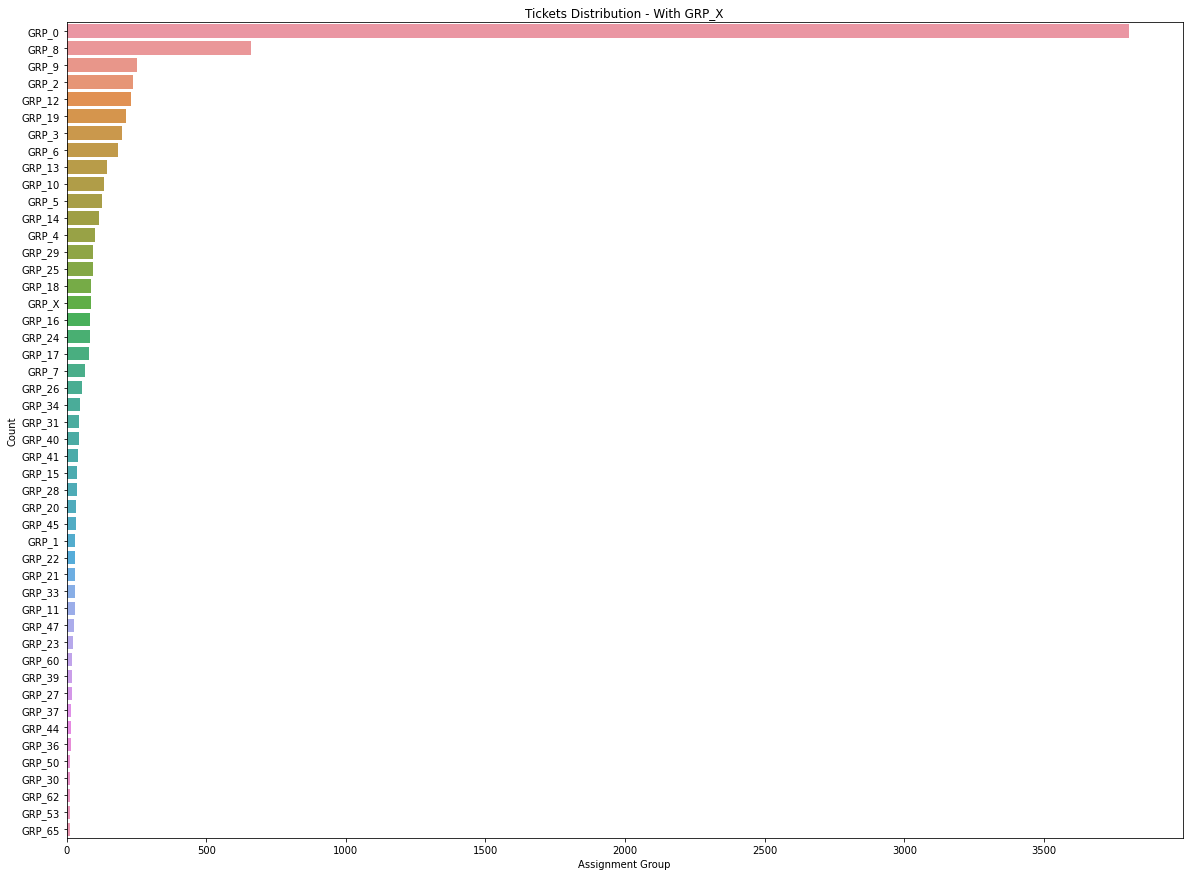

In [ ]:
#Plot line graph and view counts of each tickets - After GRP_X

plt.subplots(figsize = (20,15))

sns.countplot(y='Assignment group', data=df_filtered,order = df_filtered['Assignment group'].value_counts().index)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.title('Tickets Distribution - With GRP_X')

plt.show()

#### Preprocessing Text after google translation

In [15]:
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
snow = SnowballStemmer('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
# Apply stopwords only For ML
stop_words.update(['hi','hello','team','ticket','please','user','gmail','cc','com','en','es'])
df_filtered['tok_desc'] = df_filtered.apply(lambda row: nltk.word_tokenize(row['ML_Description']), axis=1)
df_filtered['tok_desc'] =df_filtered['tok_desc'].apply(lambda x: [item for item in x if item not in stop_words])

In [18]:

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None # for easy if-statement 

def get_lemmatized_list(list):
  output = []
  for token, tag in list: 
    wntag = get_wordnet_pos(tag)
    if wntag is None:# not supply tag in case of None
        lemma = lemmatizer.lemmatize(token) 
    else:
        lemma = lemmatizer.lemmatize(token, pos=wntag) 
    output.append(lemma)
  return output

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

#df_filtered['tok_processed'] = df_filtered['tok_desc'].apply(lambda v: get_stemmed_list(v))
df_filtered['tok_processed'] = df_filtered['tok_desc'].apply(lambda v: pos_tag(v))
df_filtered['tok_processed'] = df_filtered['tok_processed'].apply(lambda v: get_lemmatized_list(v))


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
df_filtered.head()

Description  ...                                      tok_processed
0  login issue -verified user details.(employee# ...  ...  [login, issue, verify, detail, employee, manag...
1  received from: hello team, my meetings/skype m...  ...  [receive, meeting, skype, meeting, etc, appear...
2  cant log in to vpn received from: hi i cannot ...  ...          [cant, log, vpn, receive, log, vpn, best]
3                      unable to access hr_tool page  ...                       [unable, es, hr, tool, page]
4     unable to log in to engineering tool and skype  ...            [unable, log, engineering, tool, skype]

[5 rows x 7 columns]

In [20]:
df_final = df_filtered.copy()

In [21]:
#JOINING tok_processed AS FINAL SENTENCE
sent=[]
for i in df_final['tok_processed']:
  for w in i:
      if len(i)>2:
        s=' '.join(i)
  sent.append(s)

In [22]:
#Since english we remove non ascii
import re
df_final['final_desc']=sent
df_final['final_desc'] = df_final['final_desc'].apply(lambda v: re.sub(r'\b(?:(job)\s??\b){2}','job', v))
df_final['final_desc'] = df_final['final_desc'].apply(lambda v: re.sub(r'[^\x00-\x7F]+',' ', v))


In [ ]:
print(sent)

['login issue verify detail employee manager name check name ad reset password advise login check caller confirm able login issue resolve', 'receive meeting skype meeting etc appear outlook calendar somebody advise correct kind', 'cant log vpn receive log vpn best', 'unable es hr tool page', 'unable log engineering tool skype', 'event critical HostName company value mountpoint threshold oracle SID erpdata srpsad srpsad data perpsrpsad', 'employment status new non employee enter name', 'unable disable add in outlook', 'unable disable add in outlook', 'engineering tool say connect unable submit report', 'hr tool site loading page correctly', 'unable login hr tool sgxqsuojr xwbesorf card', 'want reset password', 'unable open payslip', 'unable open payslip', 'receive xyz company unable login company vpn website try open new session use link able get pls help urgently work home tomorrow due month end closing', 'undocking pc screen come back', 'erp SID ount lock', 'unable sign vpn', 'unable 

In [ ]:
df_final.head()

Description  ...                                         final_desc
0  login issue -verified user details.(employee# ...  ...  login issue verify detail employee manager nam...
1  received from: hello team, my meetings/skype m...  ...  receive meeting skype meeting etc appear outlo...
2  cant log in to vpn received from: hi i cannot ...  ...                  cant log vpn receive log vpn best
3                      unable to access hr_tool page  ...                             unable es hr tool page
4     unable to log in to engineering tool and skype  ...                  unable log engineering tool skype

[5 rows x 8 columns]

In [ ]:
df_final.count

<bound method DataFrame.count of                                             Description  ...                                         final_desc
0     login issue -verified user details.(employee# ...  ...  login issue verify detail employee manager nam...
1     received from: hello team, my meetings/skype m...  ...  receive meeting skype meeting etc appear outlo...
2     cant log in to vpn received from: hi i cannot ...  ...                  cant log vpn receive log vpn best
3                         unable to access hr_tool page  ...                             unable es hr tool page
4        unable to log in to engineering tool and skype  ...                  unable log engineering tool skype
...                                                 ...  ...                                                ...
7820  tablet needs reimaged due to multiple issues w...  ...  tablet need reimaged due multiple issue crm wi...
7821  emails not coming in from zz mail received fro...  ...  email com

In [23]:
#Label encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_final['Target']=le.fit_transform(df_final['Assignment group'])
df_final.head()

Description  ... Target
0  login issue -verified user details.(employee# ...  ...      0
1  received from: hello team, my meetings/skype m...  ...      0
2  cant log in to vpn received from: hi i cannot ...  ...      0
3                      unable to access hr_tool page  ...      0
4                                        skype error  ...      0

[5 rows x 9 columns]

## Word cloud using Bag of Words


In [24]:
def get_bag_of_words(arrOfLists):
  output = "";
  #print (arrOfLists)
  for wordList in arrOfLists:
    #print (wordList)
    for word in wordList:
      #print (word)
      output = output+ " " + word
  return output

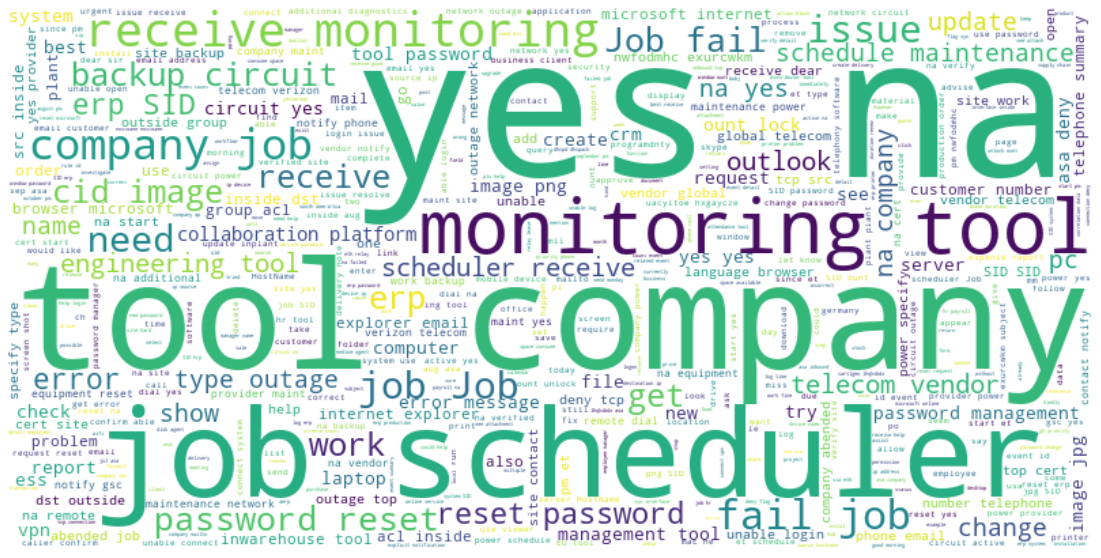

In [ ]:
#After preprocessing of translated data
#word cloud for top 3 groups data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
stopwords = STOPWORDS

#GRP_0     3976
data_df_grp0 = df_final.copy()
data_df_grp0[data_df_grp0['Assignment group'].apply(lambda x : x =='GRP_0')]
wordcloud_grp0 = WordCloud(stopwords = stop_words, max_words=500, background_color="white",width=800, height=400).generate(get_bag_of_words(data_df_grp0['tok_processed'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp0,interpolation='bilinear')
plt.axis("off")
plt.show()

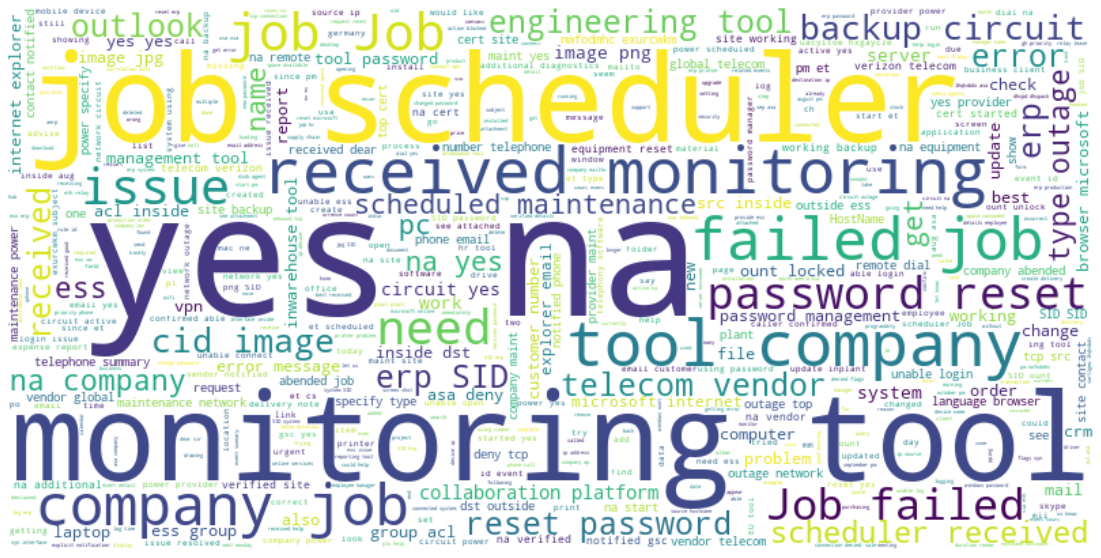

In [ ]:
#Before preprocessing of translated data
#word cloud for top 3 groups data
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#word cloud for overall data
stopwords = STOPWORDS

#GRP_0    
data_df_grp0 = df_final.copy()
data_df_grp0[data_df_grp0['Assignment group'].apply(lambda x : x =='GRP_0')]
wordcloud_grp0 = WordCloud(stopwords = stop_words, max_words=500, background_color="white",width=800, height=400).generate(get_bag_of_words(data_df_grp0['tok_desc'].values))

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud_grp0,interpolation='bilinear')
plt.axis("off")
plt.show()

#### Most Frequent words in the corpus

In [ ]:
### Most frequent words in short description
ML_description_most_freq_words = pd.Series(" ".join(df_final["final_desc"]).split()).value_counts()
ML_description_most_freq_words.head(20)

company       2667
receive       2529
tool          2481
yes           2165
na            2107
password      1997
job           1922
erp           1670
issue         1368
SID           1312
reset         1194
work          1044
unable        1017
email         1007
monitoring    1002
scheduler      996
es             992
error          969
fail           934
need           914
dtype: int64

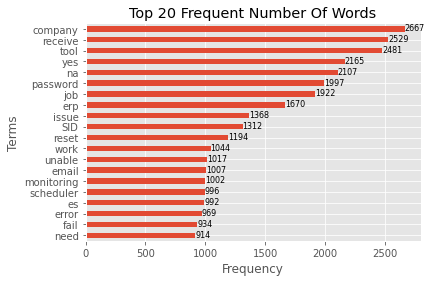

In [ ]:
### Analyzing top 20 frequent words


sd_freq_plot = ML_description_most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

plt.style.use("ggplot")
sd_freq_plot.set_xlabel("Frequency")
sd_freq_plot.set_ylabel("Terms")

totals = []
for i in sd_freq_plot.patches:
    totals.append(i.get_width())

for i in sd_freq_plot.patches:
    sd_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')

In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_final["final_desc"])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [ ]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)

frequency
yes na                     1680
monitoring tool             996
job scheduler               996
tool company                996
receive monitoring          982
company job                 803
fail job                    779
job job                     500
job fail                    492
password reset              492
backup circuit              473
cid image                   468
erp sid                     379
reset password              373
engineering tool            358
telecom vendor              347
na yes                      310
na company                  310
type outage                 306
schedule maintenance        306

#### Most Frequent Bi-gram words in corpus

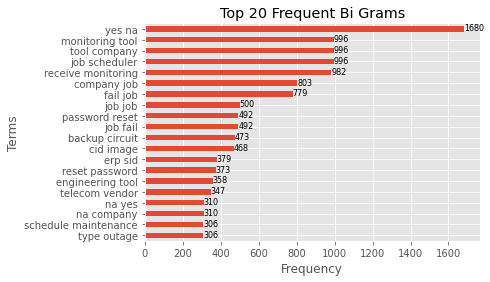

In [ ]:
### Analyzing top 20 frequent BI Gram words

plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams_plot=top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams")

totals = []
for i in top20_bigrams_plot.patches:
    totals.append(i.get_width())

for i in top20_bigrams_plot.patches:
    top20_bigrams_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')

#### Most Frequent Tri-gram words in corpus

In [ ]:
word_vectorizer = CountVectorizer(ngram_range=(3,3), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df_final["final_desc"])
frequencies = sum(sparse_matrix).toarray()[0]
tri_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [ ]:
tri_grams_df.sort_values(by = "frequency",ascending=False).head(20)

frequency
receive monitoring tool            982
monitoring tool company            982
tool company job                   803
fail job scheduler                 779
job fail job                       487
job job fail                       486
company job job                    478
na yes na                          310
yes na company                     305
cid image png                      263
backup circuit yes                 258
yes yes na                         247
password management tool           246
cid image jpg                      205
browser microsoft internet         186
internet explorer email            186
microsoft internet explorer        186
group acl inside                   185
src inside dst                     185
es group acl                       185

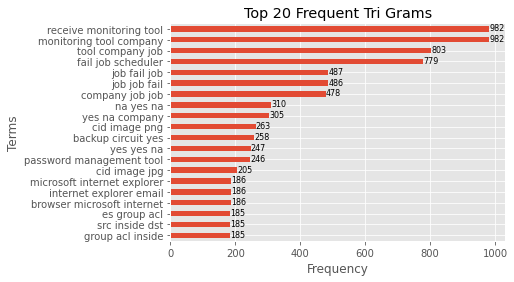

In [ ]:
### Analyzing top 20 frequent Tri Gram words

plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_trigrams = tri_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_trigrams_plot=top20_trigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Tri Grams")

totals = []
for i in top20_trigrams_plot.patches:
    totals.append(i.get_width())

for i in top20_trigrams_plot.patches:
    top20_trigrams_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')

We could see 'job job fail' and 'yes yes na' repeat more number of times. we need to remove repeated words 

## Model Building

In [ ]:
# Among all the models SVC is giving better acucracy as of now. But sill we need to do hyper parameter tuning to predict the right model

##### Model Building with Machine Learning Models

In [ ]:
# Train test split
## Stratified Split:
#stratified split
from sklearn.model_selection import StratifiedShuffleSplit
# Since the number of available samples is small, I'm going for a 90-10 split
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=100) # for train test split

for train_index,test_index in sss.split(features,y):  
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y[train_index], y[test_index]  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier

###### Logistic Regression

In [ ]:
   # ml_model = LogisticRegression(C = 100,random_state = 0)'sag', 'saga' and 'newton-cg'
ml_model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
ml_model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#train accuracy 
y_predtrain = ml_model.predict(X_train)

score_lr_train=accuracy_score(y_train,y_predtrain)
print("logistic regression Train Accuracy:",score_lr_train)

logistic regression Train Accuracy: 0.687588753195115


In [ ]:
y_pred = ml_model.predict(X_test)
score_lr_test=accuracy_score(y_test,y_pred)
print("Logistic regression Test Accuracy:",score_lr_test)

Logistic regression Test Accuracy: 0.6436781609195402


In [ ]:
confusion_matrix(y_test, y_pred)

array([[369,   0,   0, ...,   3,   0,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  6,   0,   2, ...,   4,   0,   0],
       ...,
       [  2,   0,   1, ...,  60,   0,   0],
       [  5,   0,   0, ...,  20,   0,   0],
       [  7,   0,   0, ...,   0,   0,   0]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.97      0.79       381
           1       0.00      0.00      0.00         3
           2       0.67      0.14      0.24        14
           3       0.00      0.00      0.00         3
           4       0.59      0.43      0.50        23
           5       0.62      0.57      0.59        14
           6       0.50      0.08      0.14        12
           7       0.00      0.00      0.00         4
           8       1.00      0.38      0.55         8
           9       0.88      0.88      0.88         8
          10       1.00      0.33      0.50         9
          11       0.29      0.10      0.14        21
          12       0.77      0.42      0.54        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Random Forest

In [ ]:
#Random forests
ml_model_rf = RandomForestClassifier(n_estimators=200, max_depth=30, random_state=0)
ml_model_rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
#train accuracy 
y_predtrain_rf = ml_model_rf.predict(X_train)

score_rf_train=accuracy_score(y_train,y_predtrain_rf)
print("Random forest Train Accuracy:",score_rf_train)

Random forest Train Accuracy: 0.6633058790116444


In [ ]:
y_pred_rf = ml_model_rf.predict(X_test)

score_rf_test=accuracy_score(y_test,y_pred_rf)
print("Random Forest Test Accuracy:",score_rf_test)

Random Forest Test Accuracy: 0.6130268199233716


In [ ]:
confusion_matrix(y_test, y_pred_rf)

array([[376,   0,   0, ...,   2,   1,   0],
       [  2,   0,   0, ...,   0,   0,   0],
       [  9,   0,   4, ...,   1,   0,   0],
       ...,
       [  5,   0,   1, ...,  53,   4,   0],
       [  5,   0,   0, ...,  14,   6,   0],
       [  7,   0,   0, ...,   0,   0,   0]])

In [ ]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.60      0.99      0.75       381
           1       0.00      0.00      0.00         3
           2       0.80      0.29      0.42        14
           3       0.00      0.00      0.00         3
           4       0.80      0.17      0.29        23
           5       1.00      0.14      0.25        14
           6       1.00      0.08      0.15        12
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       1.00      0.75      0.86         8
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        21
          12       0.78      0.29      0.42        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Naive Bayes

In [ ]:
ml_model_nb = MultinomialNB()
ml_model_nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
#train accuracy 
y_predtrain_nb = ml_model_nb.predict(X_train)

score_nb_train=accuracy_score(y_train,y_predtrain_nb)
print("Naive Bayes Train Accuracy:",score_nb_train)

Naive Bayes Train Accuracy: 0.6036637318943482


In [ ]:
y_pred_nb = ml_model_nb.predict(X_test)
score_nb_test=accuracy_score(y_test,y_pred_nb)
print("naive bayes Test Accuracy:",score_nb_test)

naive bayes Test Accuracy: 0.5913154533844189


In [ ]:
confusion_matrix(y_test, y_pred_nb)

array([[375,   0,   0, ...,   3,   0,   0],
       [  1,   0,   0, ...,   0,   0,   0],
       [  8,   0,   2, ...,   4,   0,   0],
       ...,
       [  1,   0,   1, ...,  64,   0,   0],
       [  5,   0,   0, ...,  20,   0,   0],
       [  7,   0,   0, ...,   0,   0,   0]])

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.61      0.98      0.75       381
           1       0.00      0.00      0.00         3
           2       0.67      0.14      0.24        14
           3       0.00      0.00      0.00         3
           4       0.56      0.22      0.31        23
           5       1.00      0.21      0.35        14
           6       0.50      0.08      0.14        12
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00         9
          11       0.00      0.00      0.00        21
          12       0.69      0.38      0.49        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### Linear SVC

In [ ]:
#linear svc
ml_model_lsvc = LinearSVC()
ml_model_lsvc.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
#train accuracy 
y_predtrain_lsvc = ml_model_lsvc.predict(X_train)

score_lsvc_train=accuracy_score(y_train,y_predtrain_lsvc)
print("Linear SVC Train Accuracy:",score_lsvc_train)

Linear SVC Train Accuracy: 0.8944902016472593


In [ ]:
#tTest accuracy 
y_pred_lsvc = ml_model_lsvc.predict(X_test)
score_lsvc_test=accuracy_score(y_test,y_pred_lsvc)
print("Linear SVC Test Accuracy:",score_lsvc_test)

Linear SVC Test Accuracy: 0.6794380587484036


In [ ]:
confusion_matrix(y_test, y_pred_lsvc)

array([[342,   1,   0, ...,   2,   4,   1],
       [  0,   1,   0, ...,   1,   0,   0],
       [  5,   0,   4, ...,   2,   1,   0],
       ...,
       [  0,   0,   1, ...,  56,   4,   0],
       [  1,   0,   0, ...,  14,   9,   0],
       [  6,   0,   0, ...,   0,   0,   1]])

In [ ]:
print(classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       381
           1       0.50      0.33      0.40         3
           2       0.57      0.29      0.38        14
           3       1.00      0.67      0.80         3
           4       0.64      0.39      0.49        23
           5       0.47      0.64      0.55        14
           6       0.57      0.33      0.42        12
           7       0.60      0.75      0.67         4
           8       0.50      0.50      0.50         8
           9       0.88      0.88      0.88         8
          10       0.33      0.22      0.27         9
          11       0.25      0.19      0.22        21
          12       0.75      0.50      0.60        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.50      0.50      0.50         2
          17       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


###### SVC

In [ ]:
#svc
ml_model_svc = SVC()
ml_model_svc.fit(X_train, y_train)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
#train accuracy 
y_predtrain_svc = ml_model_svc.predict(X_train)

 SVC Train Accuracy: 0.797784720249929


In [ ]:
score_svc_train=accuracy_score(y_train,y_predtrain_svc)
print(" SVC Train Accuracy:",score_svc_train)

 SVC Train Accuracy: 0.797784720249929


In [ ]:
#tTest accuracy 
y_pred_svc = ml_model_svc.predict(X_test)

 SVC Test Accuracy: 0.6436781609195402


In [ ]:
score_svc_test=accuracy_score(y_test,y_pred_svc)
print(" SVC Test Accuracy:",score_svc_test)

 SVC Test Accuracy: 0.6436781609195402


In [ ]:
confusion_matrix(y_test, y_pred_svc)

array([[368,   0,   0, ...,   2,   1,   0],
       [  1,   1,   0, ...,   0,   0,   0],
       [  6,   0,   4, ...,   2,   0,   0],
       ...,
       [  3,   0,   1, ...,  55,   4,   0],
       [  5,   0,   0, ...,  14,   6,   0],
       [  7,   0,   0, ...,   0,   0,   0]])

In [ ]:
print(classification_report(y_test, y_pred_lsvc))

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       381
           1       0.50      0.33      0.40         3
           2       0.57      0.29      0.38        14
           3       1.00      0.67      0.80         3
           4       0.64      0.39      0.49        23
           5       0.47      0.64      0.55        14
           6       0.57      0.33      0.42        12
           7       0.60      0.75      0.67         4
           8       0.50      0.50      0.50         8
           9       0.88      0.88      0.88         8
          10       0.33      0.22      0.27         9
          11       0.25      0.19      0.22        21
          12       0.75      0.50      0.60        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.50      0.50      0.50         2
          17       0.80    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import pickle
filename_svc = 'model_svc.sav'
pickle.dump(ml_model_svc, open(filename_svc, 'wb'))

###### KNN Classifier

In [ ]:
#KNN
ml_model_knn = KNeighborsClassifier(n_neighbors = 14, weights = 'distance')
ml_model_knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=14, p=2,
                     weights='distance')

In [ ]:
#train accuracy 
y_predtrain_knn = ml_model_knn.predict(X_train)

KNN Train Accuracy: 0.919341096279466


In [ ]:
score_knn_train=accuracy_score(y_train,y_predtrain_knn)
print("KNN Train Accuracy:",score_knn_train)

KNN Train Accuracy: 0.919341096279466


In [ ]:
y_pred_knn = ml_model_knn.predict(X_test)


KNN Test Accuracy: 0.4776500638569604


In [ ]:
score_knn_test=accuracy_score(y_test,y_pred_knn)
print("KNN Test Accuracy:",score_knn_test)

KNN Test Accuracy: 0.4776500638569604


In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[256,   0,   0, ...,   2,   3,   1],
       [  1,   0,   0, ...,   0,   0,   0],
       [  1,   0,   4, ...,   0,   1,   0],
       ...,
       [  1,   0,   1, ...,  36,  21,   0],
       [  0,   0,   0, ...,   0,  20,   0],
       [  1,   0,   0, ...,   0,   0,   1]])

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.67      0.75       381
           1       0.00      0.00      0.00         3
           2       0.80      0.29      0.42        14
           3       0.00      0.00      0.00         3
           4       0.75      0.26      0.39        23
           5       0.67      0.14      0.24        14
           6       0.33      0.08      0.13        12
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         8
           9       0.88      0.88      0.88         8
          10       0.00      0.00      0.00         9
          11       0.50      0.05      0.09        21
          12       0.75      0.38      0.50        24
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          17       1.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_df=pd.DataFrame()
model_name=['Logistic Regression', 'Random Forest', 'Naive Bayes', 'Linear SVC','SVC']
train_acc_score=[score_lr_train*100,score_rf_train*100,score_nb_train*100,score_lsvc_train*100,score_svc_train*100]
test_acc_score=[score_lr_test*100,score_rf_test*100,score_nb_test*100,score_lsvc_test*100,score_svc_test*100]
accuracy_df['ML Model']=model_name
accuracy_df['Train Accuracy']=train_acc_score
accuracy_df['Test Accuracy']=test_acc_score
accuracy_df.head()

ML Model  Train Accuracy  Test Accuracy
0  Logistic Regression       68.758875      64.367816
1        Random Forest       66.330588      61.302682
2          Naive Bayes       60.366373      59.131545
3           Linear SVC       89.449020      67.943806
4                  SVC       79.778472      64.367816

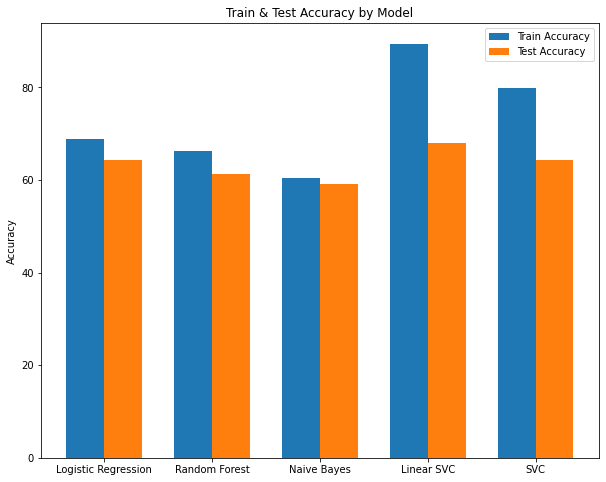

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(model_name))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (10,8))
rects1 = ax.bar(x - width/2, train_acc_score, width, label='Train Accuracy')
rects2 = ax.bar(x + width/2, test_acc_score, width, label='Test Accuracy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Train & Test Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_name)
ax.legend()

#ax.bar_label(rects1, padding=3)
#ax.bar_label(rects2, padding=3)

#fig.tight_layout()

plt.show()

#### Model Building with ML models using K-Fold Cross Validation

In [ ]:
y=df_final['Target']
X=df_final['final_desc']

In [ ]:
#TF- IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', ngram_range=(1, 2))
features = tfidf.fit_transform(X).toarray()

In [ ]:
# Train test split
## Stratified Split:
#stratified split
from sklearn.model_selection import StratifiedShuffleSplit
# Since the number of available samples is small, I'm going for a 90-10 split
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=100) # for train test split

for train_index,test_index in sss.split(features,y):  
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = y[train_index], y[test_index]    
    

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC,SVC
# we are yet to use Logistic Regression with one-vs-rest to allow logistic regression to be used for multi-class classification 
# we are yet to include KNN
from sklearn.model_selection import cross_val_score
models = [
          RandomForestClassifier(n_estimators=200, max_depth=30, random_state=0),
          LinearSVC(),
          SVC(),
          MultinomialNB(),
          LogisticRegression(multi_class='ovr', random_state=0),
          ]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, y, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


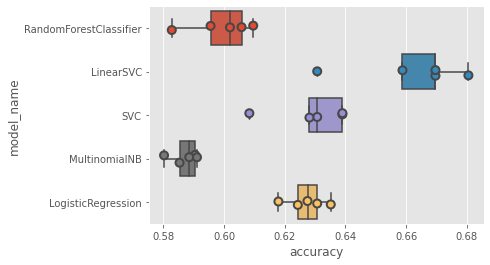

In [ ]:
import seaborn as sns
sns.boxplot(y='model_name', x='accuracy', data=cv_df)

sns.stripplot(y='model_name', x='accuracy', data=cv_df, size=8, jitter=True, edgecolor="gray", linewidth=2)